In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train_0irEZ2H.csv")

In [4]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


<h5> drop NaN vlaues

In [4]:
df.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [5]:
df=df.dropna()

<Axes: >

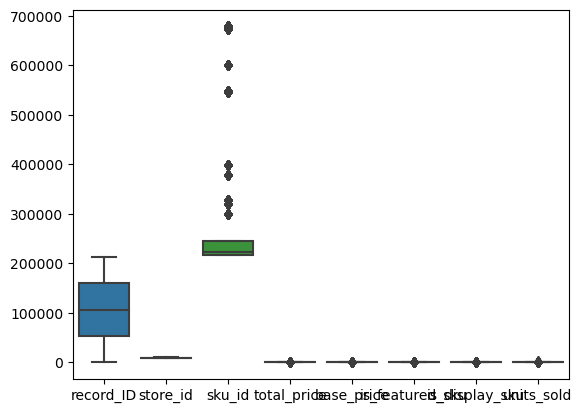

In [8]:
sns.boxplot(df)

In [6]:
df=df[df['units_sold']<df['units_sold'].quantile(0.99)]

<h5>New coloum "discount"

In [46]:
df["total_price"] = df["total_price"].abs()
df["base_price"] = df["base_price"].abs()
df["discount"]=df["base_price"]-df["total_price"]

In [47]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,discount,Year,Month,Day
0,1,8091,216418,256.5000,111.8625,0,0,20,-144.6375,2011,1,17
1,2,8091,216419,0.0000,99.0375,0,0,28,99.0375,2011,1,17
2,3,8091,216425,0.0000,133.9500,0,0,19,133.9500,2011,1,17
3,4,8091,216233,0.0000,133.9500,0,0,44,133.9500,2011,1,17
4,5,8091,217390,0.0000,141.0750,0,0,52,141.0750,2011,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,0.0000,235.8375,0,0,38,235.8375,2013,9,7
150146,212639,9984,223153,0.0000,235.8375,0,0,30,235.8375,2013,9,7
150147,212642,9984,245338,3909.4875,483.7875,1,1,31,-3425.7000,2013,9,7
150148,212643,9984,547934,598.5000,191.6625,0,1,12,-406.8375,2013,9,7


<h5> The most products have been salled

In [9]:
b=df[["sku_id","units_sold"]]
b.sort_values(by="units_sold",ascending=False).head(10)


,sku_id,units_sold
145607,219009,282
4637,219029,282
128041,222765,282
58228,216418,282
137072,219009,282
19548,219009,282
25235,216418,282
19531,219009,282
94377,219029,282
62446,217390,282


<h5>EDA

In [12]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,discount
count,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000
mean,106356.588058,9199.583288,255098.204286,207.275983,219.517245,0.088869,0.126854,47.842931,12.241261
std,61366.203118,615.039811,85894.840327,103.582207,111.379804,0.284555,0.332811,42.898220,31.028874
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000,-106.875000
25%,53226.500000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,19.000000,0.000000
50%,106298.000000,9371.000000,222087.000000,198.787500,205.912500,0.000000,0.000000,35.000000,0.000000
75%,159482.500000,9731.000000,245338.000000,234.412500,235.125000,0.000000,0.000000,61.000000,0.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,282.000000,250.800000


<h5> Hetmap to show the Correlation

<Axes: >

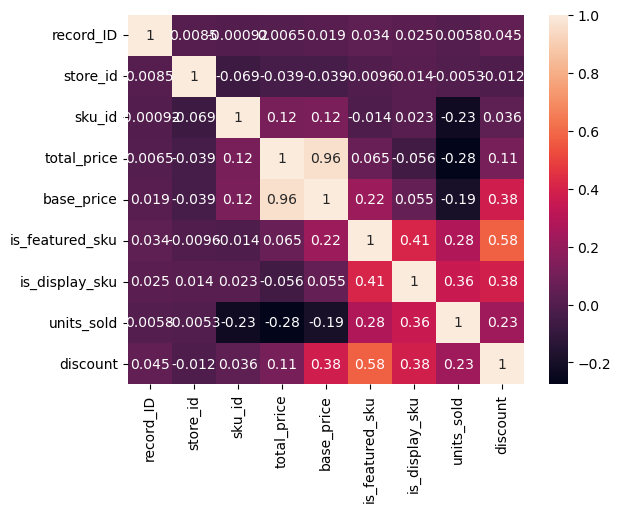

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [11]:
df["week"]=pd.to_datetime(df["week"])

In [12]:
df["Year"]=df["week"].dt.year
df["Month"]=df["week"].dt.month
df["Day"]=df["week"].dt.day

In [13]:
df.drop("week",inplace=True,axis=1)

In [18]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,discount,Year,Month,Day
0,1,8091,216418,99.0375,111.8625,0,0,20,12.8250,2011,1,17
1,2,8091,216419,99.0375,99.0375,0,0,28,0.0000,2011,1,17
2,3,8091,216425,133.9500,133.9500,0,0,19,0.0000,2011,1,17
3,4,8091,216233,133.9500,133.9500,0,0,44,0.0000,2011,1,17
4,5,8091,217390,141.0750,141.0750,0,0,52,0.0000,2011,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,0.0000,2013,9,7
150146,212639,9984,223153,235.8375,235.8375,0,0,30,0.0000,2013,9,7
150147,212642,9984,245338,357.6750,483.7875,1,1,31,126.1125,2013,9,7
150148,212643,9984,547934,141.7875,191.6625,0,1,12,49.8750,2013,9,7


In [43]:
df.describe()


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,discount,Year,Month,Day
count,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000
mean,106356.588058,9199.583288,255098.204286,890.335360,219.517245,0.088869,0.126854,47.842931,12.241261,2011.831998,6.132129,15.706973
std,61366.203118,615.039811,85894.840327,2984.179105,111.379804,0.284555,0.332811,42.898220,31.028874,0.756143,3.436063,8.954246
min,1.000000,8023.000000,216233.000000,-8455.950000,61.275000,0.000000,0.000000,1.000000,-106.875000,2011.000000,1.000000,1.000000
25%,53226.500000,8562.000000,217217.000000,0.000000,133.237500,0.000000,0.000000,19.000000,0.000000,2011.000000,3.000000,7.000000
50%,106298.000000,9371.000000,222087.000000,0.000000,205.912500,0.000000,0.000000,35.000000,0.000000,2012.000000,6.000000,16.000000
75%,159482.500000,9731.000000,245338.000000,0.000000,235.125000,0.000000,0.000000,61.000000,0.000000,2012.000000,9.000000,24.000000
max,212644.000000,9984.000000,679023.000000,53793.750000,562.162500,1.000000,1.000000,282.000000,250.800000,2013.000000,12.000000,31.000000


In [48]:
# Count the number of negative total prices
negative_total_prices = (df["total_price"] < 0).sum()
print(f"Number of negative total price values: {negative_total_prices}")


Number of negative total price values: 0


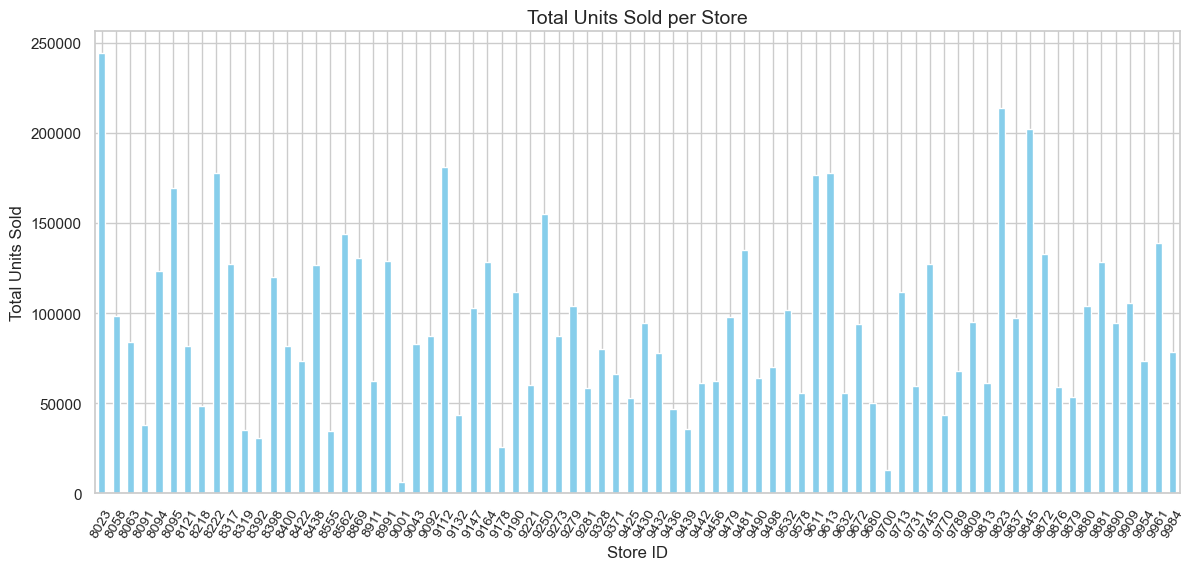

In [49]:
import matplotlib.pyplot as plt

# Group by store_id and sum the units_sold
store_sales = df.groupby("store_id")["units_sold"].sum()

# Increase figure size
plt.figure(figsize=(14, 6))  # Increase width

# Plot bar chart
store_sales.plot(kind="bar", color="skyblue")

# Label axes and title
plt.xlabel("Store ID", fontsize=12)
plt.ylabel("Total Units Sold", fontsize=12)
plt.title("Total Units Sold per Store", fontsize=14)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=60, fontsize=10)  

# Show plot
plt.show()


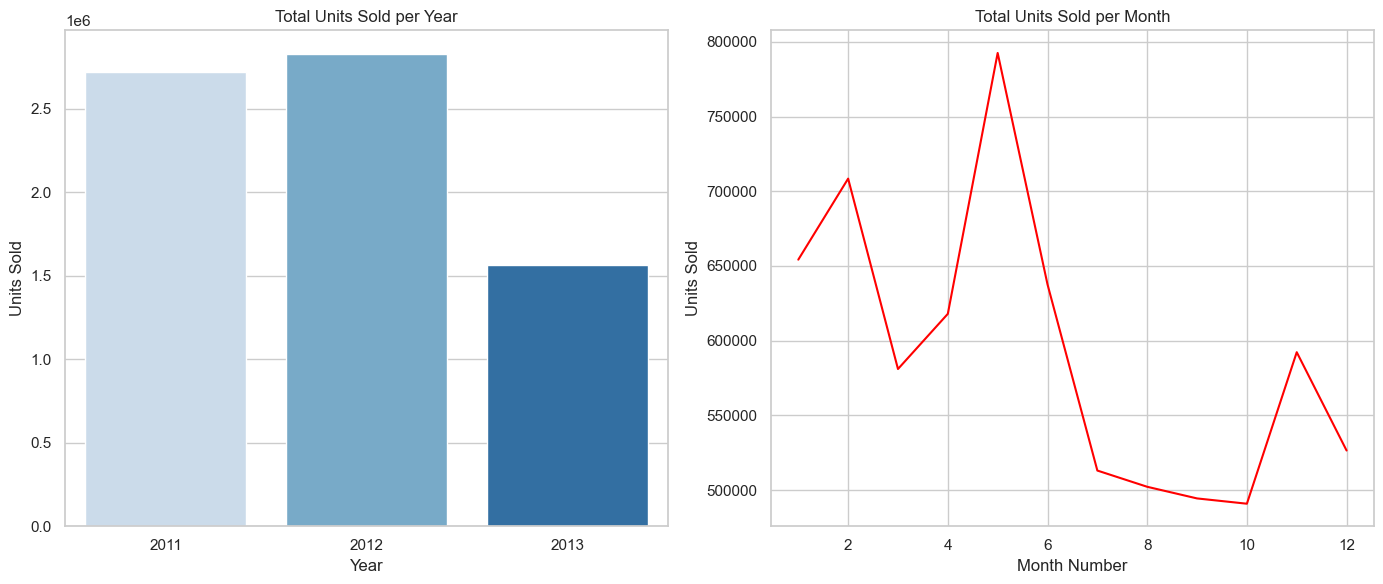

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df has columns: "year", "week", "store_id", "price", "units_sold"

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create a figure with a 1x2 layout (2 subplots)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Units Sold per Year (Bar Chart)
yearly_sales = df.groupby("Year")["units_sold"].sum()
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, ax=axes[0], palette="Blues")
axes[0].set_title("Total Units Sold per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Units Sold")

# 2. Units Sold per Month (Line Chart)
weekly_sales = df.groupby("Month")["units_sold"].sum()
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, ax=axes[1], color="red")
axes[1].set_title("Total Units Sold per Month")
axes[1].set_xlabel("Month Number")
axes[1].set_ylabel("Units Sold")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


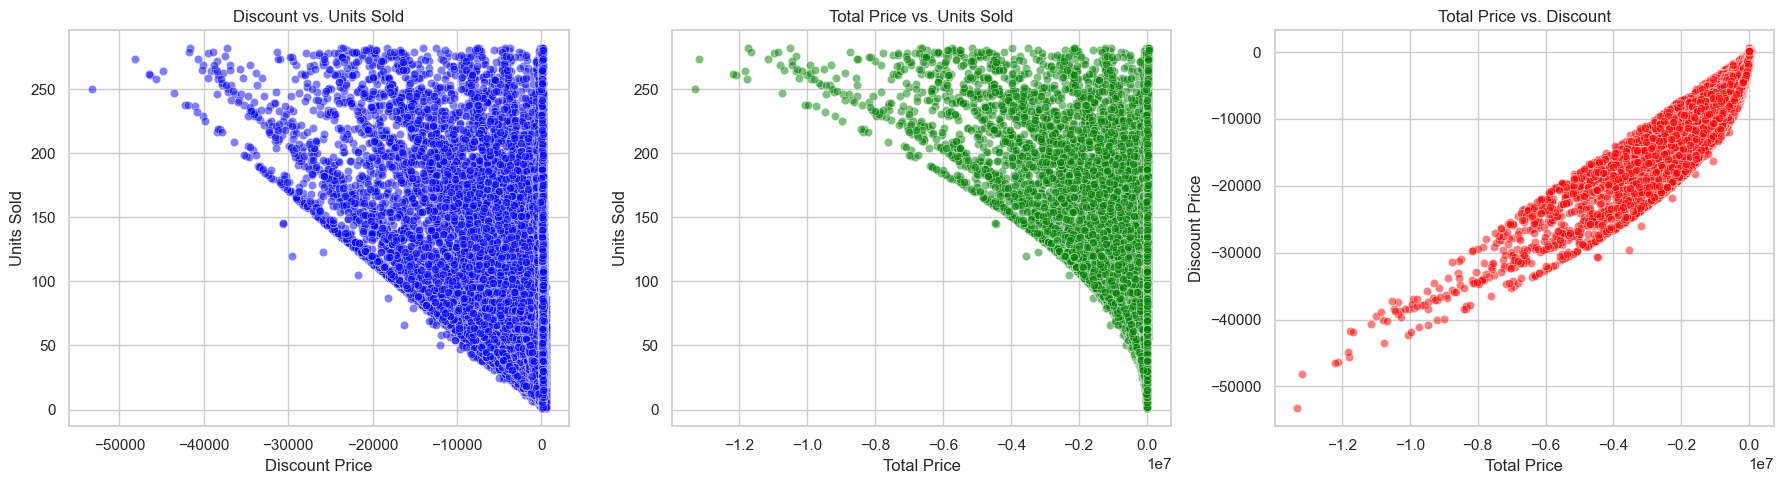

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total price (revenue per transaction)
df["total_price"] = df["discount"] * df["units_sold"]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Discount vs. Units Sold
sns.scatterplot(data=df, x="discount", y="units_sold", ax=axes[0], alpha=0.5, color="blue")
axes[0].set_title("Discount vs. Units Sold")
axes[0].set_xlabel("Discount Price")
axes[0].set_ylabel("Units Sold")

# 2. Total Price vs. Units Sold
sns.scatterplot(data=df, x="total_price", y="units_sold", ax=axes[1], alpha=0.5, color="green")
axes[1].set_title("Total Price vs. Units Sold")
axes[1].set_xlabel("Total Price")
axes[1].set_ylabel("Units Sold")

# 3. Total Price vs. Discount
sns.scatterplot(data=df, x="total_price", y="discount", ax=axes[2], alpha=0.5, color="red")
axes[2].set_title("Total Price vs. Discount")
axes[2].set_xlabel("Total Price")
axes[2].set_ylabel("Discount Price")

# Improve layout
plt.tight_layout()
plt.show()


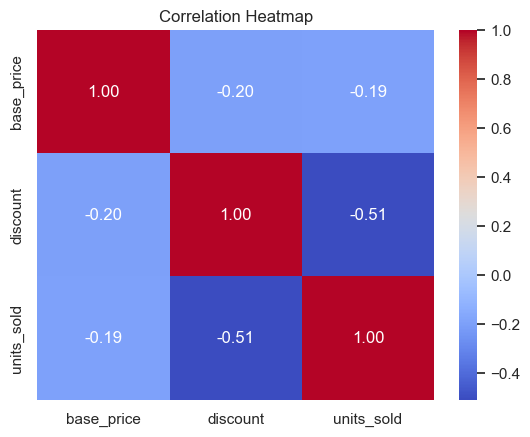

In [52]:
import numpy as np

corr = df[["base_price", "discount", "units_sold"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
